# Hypothesis Testing

* $H_0$ = `Null` = default, no change
* $H_1$ = $H_a$ = `Alternative`
* 1 - $\alpha$ = `Confidence Interval`, True Pos = 95%, 99% and 99.9%
* $\alpha$ = Significance, `False Pos` rate = P(FP)=P(Type I Error)
* 1 - $\beta$ = `Statistical Power`, True Neg = P(Reject $H_0$ when $H_0$ is false)
* $\beta$ = `False Neg` rate = P(FN)=P(Type II Error)
* $p$ = `p-value` = P(observed by chance | $H_0$ is true)

#### Examples
* $H_0$ : There is no difference in right-handed people and left-handed individual's heights.
* $H_a$ : There is a difference in right-handed people and left-handed individual's heights.

* $H_0$ : The amount of sleep a student gets the night before an exam makes no difference on the student's exam score.
* $H_a$ : Less sleep the night before an exam leads to a lower exam score.

* $H_0$ : There is no difference in grade for coffee and non-coffee drinkers.
* $H_a$ : Coffee drinkers have higher grades than non-coffee drinkers.

## Overview Exercises
- $H_0$
- $H_a$
- 1 - $\alpha$
- 1 - $\beta$
- $\alpha$
- $\beta$

#### Has the network latency gone up since we switched internet service providers?
- $H_0$ = Network latency has NOT gone up since we switched ISPs
- $H_a$ = Network latency HAS gone up since we switched ISPs
- 1 - $\alpha$ = Latency roughly same from old latency (lot of overlap)
- 1 - $\beta$ = Latency definitely higher than old latency (very little overlap)
- $\alpha$ = Latency roughly same as old but someone complains
- $\beta$ = Latency definitely more than old but no complaints

#### Is the website redesign any good?
- $H_0$ = Website redesign made no change
- $H_a$ = Website redesign was better
- 1 - $\alpha$ = Website visits the same
- 1 - $\beta$ = Website visits increased
- $\alpha$ = Website usability is better but visits the same
- $\beta$ = Website usability is bad but visits increased

#### Is our television ad driving more sales?
- $H_0$ = TV ad not driving more sales
- $H_a$ = TV ad driving more sales
- 1 - $\alpha$ = Sales roughly the same
- 1 - $\beta$ = Sales increased
- $\alpha$ = Same sales but ad watched a lot
- $\beta$ = More sales but ad not watched a lot

## Comparison of Means Exercises
- A. Plot Distribution
- B. Set Hypothesis 
    - $H_0$ & $H_a$
- C. Set Alpha (ex: $\alpha$ = .05)
- D. Verify Assumptions
    - sample size
    - normal dist
    - independent samples (n/a for 1-sample)
    - equal variances (`np.var()`; `equal_var=False` if not)
        - `scipy.stats.levene(`sample_1, sample_2, ... sample_n`)`
- E. Compute test statistic (t-stat) & p-value
    - `ttest_1samp(`sample_mean, overall_mean`)`
        - `wilcoxon(`sample`)`
    - `ttest_ind(`sample_1, sample_2, `equal_var=`True/False`)`
        - `mannwhitneyu(`sample_1, sample_2`)`
    - `f_oneway(`sample_1, sample_2, ... sample_n`)`
        - `kruskal(`sample_n`)`
- F. Decide
    - p < $\alpha$ for 2-tail
    - p/2 < $\alpha$ for 1-tail
    - t > 0 & t < 0 for greater/less than

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
rng = np.random.default_rng(42)

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?


In [2]:
# 1-sample
# 2-tail
# ttest_1samp or wilcoxon

- Are adults who drink milk taller than adults who don't drink milk?


In [3]:
# 2-sample
# 1-tail greater
# ttest_ind or mannwhitneyu

- Is the the price of gas higher in texas or in new mexico?


In [4]:
# 2-sample
# 1-tail greater
# ttest_ind or mannwhitneyu

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [5]:
# 3-sample
# 2-tail
# f_oneway or kruskal

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [6]:
# 2-sample
# 2-tail

office_1 = stats.norm(90,15).rvs(40)
office_2 = stats.norm(100,20).rvs(50)
alpha = .05

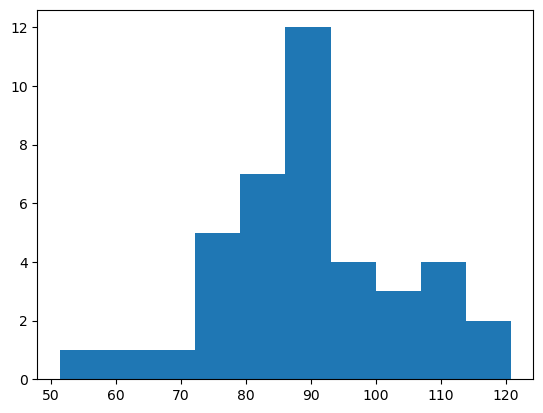

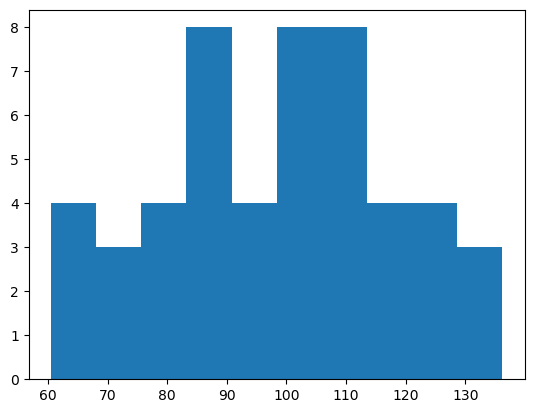

In [7]:
# plot dist
plt.hist(office_1)
plt.show()
plt.hist(office_2)
plt.show()

In [8]:
# hypothesis
# H0 = no diff in avg time to sell homes between offices
# Ha = yes diff in avg time to dell homes between offices

In [9]:
# verify
t, p = stats.levene(office_1,office_2)
t, p

(6.047423736439619, 0.015883419135409714)

In [10]:
# compute
t,p = stats.ttest_ind(office_1, office_2)
t,p

(-2.2425252552130104, 0.027440215961934557)

In [11]:
# decide
print("Reject H0? ", p < alpha)

Reject H0?  True


3. Load the `mpg` dataset and use it to answer the following questions:

In [12]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [13]:
# 2-sample, 2-tail
mpg['fe'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [14]:
o8 = mpg.fe[mpg.year==2008]
ninety9 = mpg.fe[mpg.year==1999]
o8.shape, ninety9.shape

((117,), (117,))

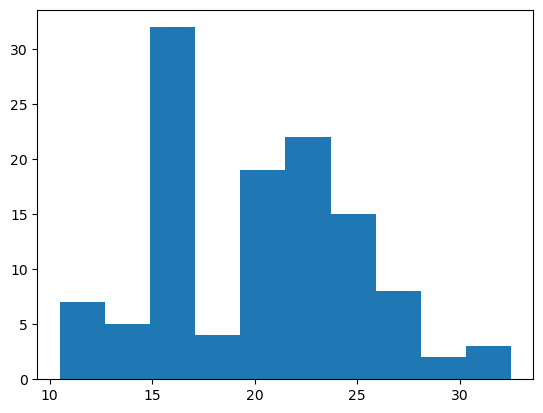

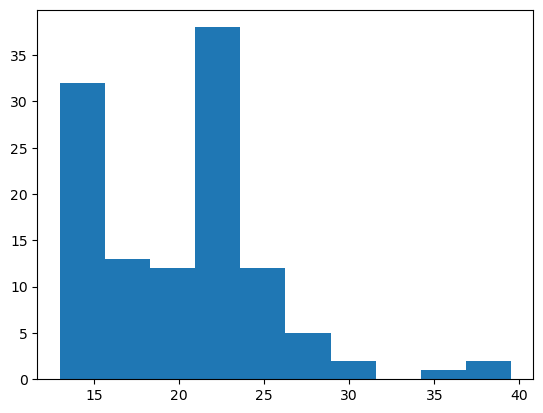

In [15]:
# dist
plt.hist(o8)
plt.show()
plt.hist(ninety9)
plt.show()

In [16]:
# H0 = 2008 fe = 1999 fe
# Ha = 2008 fe != 1999 fe
# alpha already 0.05

In [17]:
# verify
t, p = stats.levene(o8,ninety9)
t, p

(0.033228136671080453, 0.855517569468803)

In [18]:
# compute
t, p = stats.ttest_ind(o8,ninety9)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [19]:
# decide
print("Reject H0? ", p < alpha)

Reject H0?  False


- Are compact cars more fuel-efficient than the average car?


In [20]:
# 1-sample, 1-tail greater
cc = mpg.fe[mpg['class']=='compact']
mpg_fe = mpg.fe
mpg_fe_avg = mpg.fe.mean()

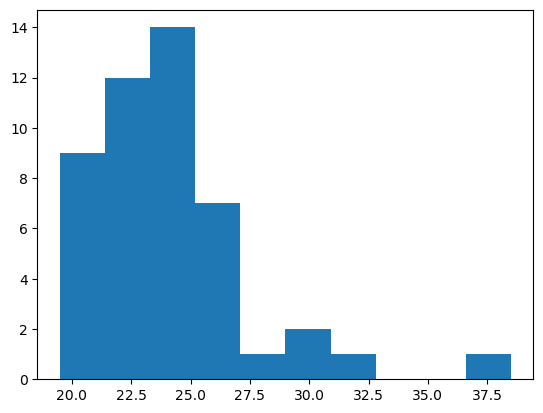

In [21]:
# dist
plt.hist(cc)
plt.show()

In [22]:
# H0 = compact fe <= all fe
# Ha = compact fe > all fe
# alpha already 0.05

In [23]:
# verify
cc.shape

(47,)

In [24]:
# compute
t, p = stats.ttest_1samp(cc,mpg_fe_avg)
t, p/2

(7.896888573132533, 2.0992818971585743e-10)

In [25]:
# decide
if t>0 and (p/2)<alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

Reject H0


- Do manual cars get better gas mileage than automatic cars?

In [26]:
# 2-sample, 1-tail manual>auto
mpg['auto'] = np.where(mpg['trans'].str.contains('auto'),'auto','manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe,auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [27]:
auto = mpg.fe[mpg.auto=='auto']
manual = mpg.fe[mpg.auto=='manual']
auto.shape, manual.shape

((157,), (77,))

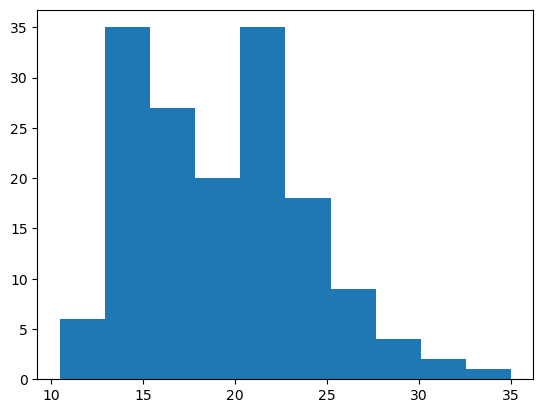

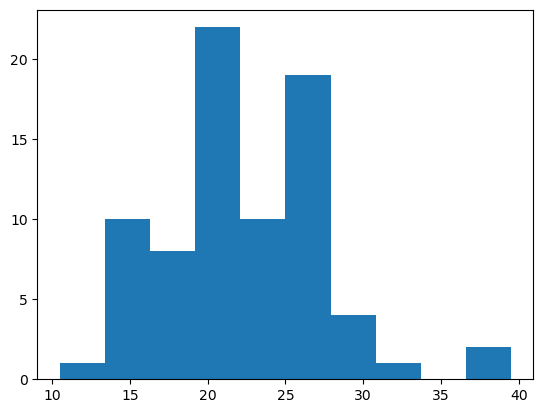

In [28]:
# dist
plt.hist(auto)
plt.show()
plt.hist(manual)
plt.show()

In [29]:
# H0 = manual fe <= auto fe
# Ha = manual fe > auto fe
# alpha same .05

In [30]:
# verify
t,p = stats.levene(manual, auto)
t,p

(0.20075824847529639, 0.6545276355131857)

In [37]:
# compute
t,p = stats.ttest_ind(manual, auto)
t,p/2

(4.593437735750014, 3.5771872005728424e-06)

In [38]:
# decide
if t>0 and (p/2)<alpha:
    print('Reject H0')
else:
    print('Failed to reject H0')

Reject H0


## Correlation Exercises

`stats.pearsonr(`x,y`)`

Answer with the type of stats test you would use (assume normal distribution):


- Is there a relationship between the length of your arm and the length of your foot?


In [34]:
# 2-sample, 2-tail
# pearson r

- Do guys and gals quit their jobs at the same rate?


In [35]:
# 2-samples, 2-tail
# ttest_ind

- Does the length of time of the lecture correlate with a students grade?

Use the `telco_churn` data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?


Use the `employees` database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?


Use the `sleepstudy` data.
- Is there a relationship between days and reaction time?